In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
#importing the file to read
data = pd.read_csv(r'C:\Users\ASUS\Desktop\python\expenses.csv')
copied_data = data.copy()

In [2]:
price1 =data['PreviousMonth']
price2 = data['CurrentMonth']
category = data['Category']

price_old= price1
price2_old=price2
category_old=category

In [3]:
data.head()

,PreviousMonth,CurrentMonth,Category
0,34.6200,78.024,1
1,30.2800,43.520,2
2,35.8400,72.902,4
3,60.1820,86.308,3
4,79.0327,75.344,6


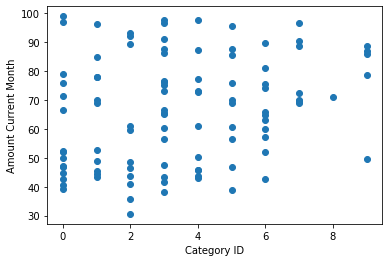

In [4]:
#Visualization Part 1
plt.scatter(category, price2)
plt.ylabel('Amount Current Month')
plt.xlabel('Category ID')
plt.show()

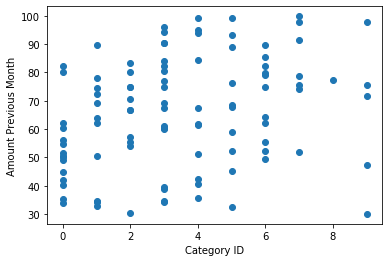

In [5]:
#Visualization Part 1
plt.scatter(category, price1)
plt.ylabel('Amount Previous Month')
plt.xlabel('Category ID')
plt.show()

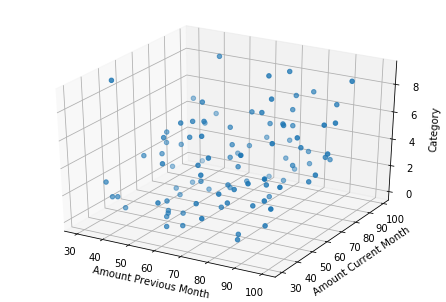

In [6]:
#Visualization Part 1
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(price1, price2, category)
ax.set_xlabel('Amount Previous Month')
ax.set_ylabel('Amount Current Month')
ax.set_zlabel('Category')
plt.show()

In [7]:
#Normalization of Data
price1 = (price1-price1.mean())/price1.std()
price2 = (price2-price2.mean())/price2.std()
category = (category-category.mean())/category.std()
n= len(price1)
x0=np.ones(n)
X=np.array([x0,price1,category]).T
beta=np.array([2,3,0])
alfa = 0.001
#Cost Function
def cost_function(X,Y,B):
    m=len(Y)
    #hypothesis
    h=X.dot(B)
    loss=h-Y
    error_sq= (loss**2)
    J= np.sum(error_sq)
    return J /(2*m)
print(cost_function(X,price2,beta))

init_cost = cost_function(X,price2,beta)

7.019208597704392


In [8]:
# Gradient Descent Function 
def gradient_descent(X,Y,B, alfa, iters):
    cost_history = [0]*iters #new array with lenght "iterations" full of 0s
    m=len(Y)
    for iterr in range (iters):
        if iterr % 1000==0:
            print("Iteration #%d" % iterr)
            print(cost_function(X,Y,B))
    #hypothesis 
        h=X.dot(B)
        loss= h-Y
        grad = X.T.dot(loss) /m

        B= B-alfa* grad
        cost=cost_function(X,Y,B)
        cost_history[iterr] = cost
    return B, cost_history

new_theta, cost_history = gradient_descent(X,price2,beta,alfa,10000)


Iteration #0
7.019208597704392
Iteration #1000
1.4193141446859072
Iteration #2000
0.6310910362588404
Iteration #3000
0.4953214752906011
Iteration #4000
0.46819299887604165
Iteration #5000
0.4622676027061808
Iteration #6000
0.46090939420728455
Iteration #7000
0.46059006266840397
Iteration #8000
0.46051396997655475
Iteration #9000
0.460495707249191


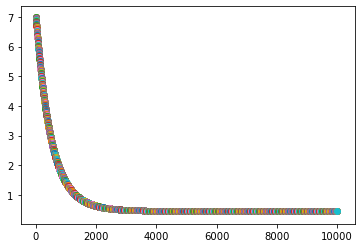

In [9]:
#Visualization Part 2 (Cost at each Iteration)
for i in range(10000):
    plt.scatter(i,cost_history[i])
plt.show()

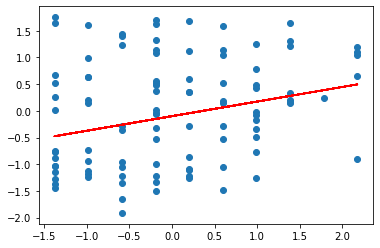

In [10]:
#Prediction lines
plt.figure()
plt.scatter(category, price2)
prediction = new_theta[2]*category  + new_theta[1]
plt.plot(category, prediction, 'r')
plt.show()


In [10]:
print('predicted response:',prediction, sep='\n')

predicted response:
0    -0.368498
1    -0.260574
2    -0.044726
3    -0.152650
4     0.171122
        ...   
95   -0.260574
96   -0.044726
97    0.063198
98    0.171122
99    0.171122
Name: Category, Length: 100, dtype: float64


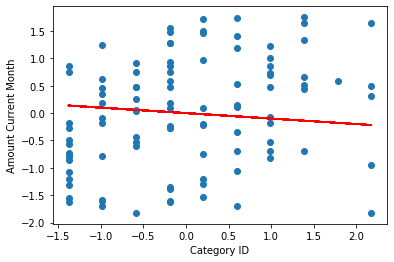

In [11]:
#Predtiction Lines
plt.figure()
plt.scatter(category, price1)
plt.xlabel("Category ID")
plt.ylabel("Amount Current Month")
prediction = new_theta[1]*category + new_theta[0]
plt.plot(category, prediction, 'r')
plt.show()

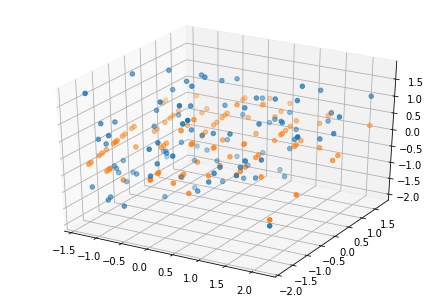

In [12]:
# Orange points represent predicted values
ax = Axes3D(plt.figure())
ax.scatter(category, price1, price2)
pred=new_theta[2]*price1 + new_theta[1]*category + new_theta[0]
ax.scatter(category, price1, pred, 'r')

In [13]:
#Testing 1
category1 = 6
price1 = 77.12
actual_price_1 = 86.12
category1 = (category1 - category_old.mean()) / category_old.std()
price1 = (price1 - price_old.mean()) / price_old.std()
actual_price_1 = (actual_price_1 - price2_old.mean()) / price2_old.std()
predcition_1 = new_theta[2] * price1 + new_theta[1] * category1 + new_theta[0]

pred1= predcition_1*price2_old.std() + price2_old.mean()
ap1 = actual_price_1*price2_old.std() + price2_old.mean()
print(pred1, ' ', ap1)
print("Predicted expense for the next month for category"'₼{:,.2f}'.format(pred1))

67.37188356325949   86.12
Predicted expense for the next month for category₼67.37


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
m1 = len(category_old)
x01 = np.ones(m1)
X1 = np.array([x01, category_old, price_old])
X1 = X1.transpose()
y1 = price2_old
print(y1)

0     78.024
1     43.520
2     72.902
3     86.308
4     75.344
       ...  
95    48.380
96    87.103
97    68.775
98    64.930
99    89.520
Name: CurrentMonth, Length: 100, dtype: float64


In [16]:
regressor = LinearRegression()# Linear Regression of scikit library
regressor.fit(X1, y1)# Fit function adjusts weights according to data values 

print(regressor.intercept_)# expected mean value
print(regressor.coef_)# same as a slope of the line of regression equation 

65.52602410294773
[ 0.          2.01623731 -0.09664263]


In [19]:
# Testing 1

cat = 6
pr = 77.12
actual_price_12 = 86.12


cat = (cat - category_old.mean()) / category_old.std()
pr = (pr - price_old.mean()) / price_old.std()

new_value = (np.array([1, cat, pr])).reshape(1, -1)

y_predict = regressor.predict(new_value)
print(y_predict)

normal = (y_predict * price_old.std() + price_old.mean())


[67.4704196]


Text(0, 0.5, 'Frequency')

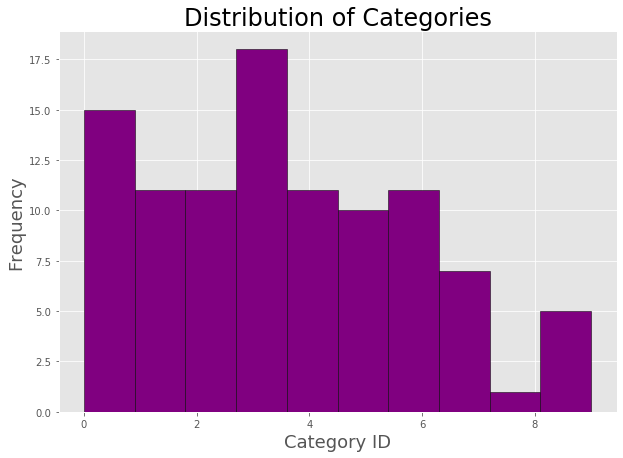

In [20]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# histogram of the height
data.Category.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Categories', size=24)
plt.xlabel('Category ID', size=18)
plt.ylabel('Frequency', size=18)
